# Enron Bonuses Prediction

From: https://github.com/ksatola

## Description
Use a **Simple Linear Regression** to predict the bonuses for Enron employees.

## Origin
This is Python 3 version of a mini-project from [Udacity's Intro to Machine Learning](https://classroom.udacity.com/courses/ud120) free course.

## Steps to Prepare
none

## Additional Information
none

In [1]:
import sys
from time import time
import pickle
import matplotlib

%matplotlib inline

In [2]:
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    

dictionary = pickle.load(open("final_project_dataset_modified.pkl", "rb"))

# list the features you want to look at 
# first item in the list will be the "target" feature
features_list = ["bonus", "salary"]
#features_list = ["bonus", "long_term_incentive"]

from feature_format import featureFormat, targetFeatureSplit
data = featureFormat(dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# Measure time
t0 = time()

# Fit the model
reg = LinearRegression()
reg.fit(feature_train, target_train)

print("Coefficient: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

print("Training time: {} seconds.".format(round(time()-t0, 3)))

Coefficient: [1.97017287]
Intercept: 662220.4176015807
Training time: 0.007 seconds.


In [5]:
len(feature_test)

40

Coefficient: [2.36761212]
Intercept: 229541.90407383675


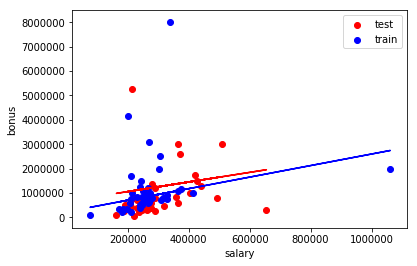

In [6]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color) 
for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot(feature_test, reg.predict(feature_test), color="r")
    
except NameError:
    pass

# See how the regression line based on test data compares to another based on train data
reg2 = LinearRegression()
reg2.fit(feature_test, target_test)
print("Coefficient: {}".format(reg2.coef_))
print("Intercept: {}".format(reg2.intercept_))
plt.plot(feature_train, reg2.predict(feature_train), color="b")
    
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
 

In [7]:
# Calculate regression performance metrics
# r-squared score - the closer to 1 the better
r2_test = reg.score(feature_test, target_test) # low if overfitted
r2_train = reg.score(feature_train, target_train) # this is just to compare, as we should trust the score on the test data

print("R Squared for test: {}".format(r2_test))
print("R Squared for train: {}".format(r2_train))

R Squared for test: -0.04471207836147806
R Squared for train: 0.04164573226747781


In [8]:
# Save the Model for later use

model_filename = '11_SimpleLinearRegression.model'

# Save the model to disk (serialize model on disk)
import pickle
pickle.dump(reg, open(model_filename, 'wb'))

In [9]:
# Load the model from disk (and perform predictions on a model without train data)
model = pickle.load(open(model_filename, 'rb'))
#r2_test = reg.score(feature_test, target_test) # low if overfitted
#print("R Squared for test: {}".format(r2_test))
result = model.score(feature_test, target_test)
result

-0.04471207836147806

In [10]:
### Read in data dictionary, convert to numpy array
data_dict = pickle.load(open("final_project_dataset.pkl", "rb"))
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

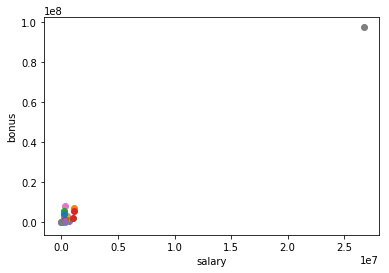

In [11]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [12]:
### Read in data dictionary, convert to numpy array
data_dict = pickle.load(open("final_project_dataset.pkl", "rb"))

# Remove the outlier (it is a total from the spreadsheet)
# See 10_EnronDataset for how the "TOTAL" key was found
data_dict.pop('TOTAL', 0)

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

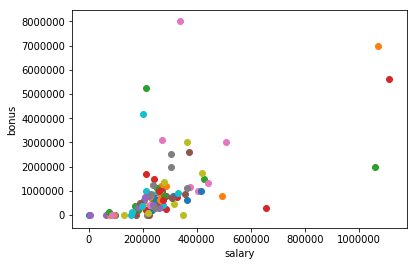

In [13]:
# Check if the outlier is removed
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()